## Lecture 2: Preprocessing and Visualization

### _What is preprocessing?_

Preprocessing is a catch-all term for techniques that allow you to transform your data from a raw string of text into something that can easily be interacted with. When we talk about preprocessing, we typically refer to things like tokenization, lemmatization, POS-tagging, sentence boundary detection, etc. 

### _Why is it important?_

Say you have a long string of text (maybe a book chapter?) and you need to extract frequency counts for all individual words that appear in that text. In Python, you can index into the string (e.g. `my_string[2]`), but this will return a single character. You can also return numerous characters by slicing (e.g. `my_string[2:5]`), but how do you know where the word boundaries are? A good tokenizer will help you do this, splitting the words away from each other and placing them into a list, which you can easily interact with. 

Similarly, say you already tokenized your input and want to count how many times a given verb occurs in the corpus. In English and the majority of the world's languages, verbs take on many inflected forms that make it difficult to track the occurence of the verb in aggregate. For example, for a verb like *play*, you might encounter *played*, *playing*, *plays*, etc. in your text. This is simple enough to count for a single verb (add the occurences of all individual forms together), but, if you're working with many word, you don't want to inventory every verb's inflected forms. That would be extremely time-consuming. Lemmatizers do this work for you, analyzing every word in a sentence and transforming it into its base, uninflected form (if needed). 

### _How can we do it?_

For something like English tokenization, we can usually write a simple script that splits all words in a string into a list of tokens. Lemmatization is a bit trickier and POS-tagging is even harder than that. Fortunately, like we saw in the web scraping lecture, there are many Python libraries that can help you do this. [NLTK](https://www.nltk.org/) and [SpaCy](https://spacy.io) are two popular toolkits that come bundled with pretrained models for tokenization/segmentation, lemmatization, POS-tagging, Named-Entity Recognition, among many others. For the sake of this lecture, we'll focus on SpaCy, which is more oriented for pratical applications, rather than education purposes. 

### Tokenization

Before diving into SpaCy, let's think about how we would begin to process raw text in Python. 

In [13]:
sent = "I quickly ran to the store, after realizing we ran out of milk."

The simplest thing here would be to split the sentence on whitespace:

In [14]:
tokenized_sent = sent.split(" ")
print(tokenized_sent)

['I', 'quickly', 'ran', 'to', 'the', 'store,', 'after', 'realizing', 'we', 'ran', 'out', 'of', 'milk.']


This looks OK, but we still see punctuation marks attached to several words, treating them as part of the tokens: `store,`, `milk.`. Maybe we can add spaces between words and their trailing punctuation marks before splitting on whitespace. 

In [15]:
sent = sent.replace(",", " ,")
sent = sent.replace(".", " .")
tokenized_sent = sent.split(" ")
print(tokenized_sent)

['I', 'quickly', 'ran', 'to', 'the', 'store', ',', 'after', 'realizing', 'we', 'ran', 'out', 'of', 'milk', '.']


This looks better. We can also remove the punctuation entirely, if we want. 

In [16]:
tokenized_sent = [tok for tok in tokenized_sent if tok.isalnum()]
print(tokenized_sent)

['I', 'quickly', 'ran', 'to', 'the', 'store', 'after', 'realizing', 'we', 'ran', 'out', 'of', 'milk']


There are a few things we haven't addressed, but it seems like we can write a reasonable tokenizer for English (and many European languages) with a few lines of code (even less if we used regex). However, there are a lot of languages whose scripts do not rely on whitespace to separate words. Consider these two sentences in Chinese:

In [17]:
sent1 = "夏天能穿多少穿多少"
sent2 = "冬天能穿多少穿多少"

Sentence 1 roughly translates to "Wear as little as you can in the summer", while sentence 2 to "Wear as much as you can in the winter". Depending on the collocated term - 夏天 (summer) or 冬天 (winter) - the following character sequence can be segmented as follows:

In [18]:
tokenized_sent1 = [("夏天", "summer"), ("能", "can"), \
                   ("穿", "wear"), ("多", "more"), ("少", "little"), \
                   ("穿", "wear"), ("多", "more"), ("少", "little")]

tokenized_sent2 = [("夏天", "winter"), ("能", "can"), \
                   ("穿", "wear"), ("多少", "amount"), \
                   ("穿", "wear"), ("多少", "amount")]

Clearly, there's no white space here so we can't use our previous code. Also, it seems that _how_ we choose to segment the character sequence has direct implications for how the sentence will eventually be interpreted. Such decisions are typically handled by machine learning models trained for tokenization/segmentation. We won't cover these here, but it's very important to be aware of such situations. 

### SpaCy

Now let's move on to SpaCy, which can tokenize preprocess everything for us in one go. 

You can install SpaCy like so: 

`$ pip install -U spacy`

After installing, you have to download SpaCy's models, which will be immediately integrated with the library:

`$ python -m spacy download en_core_web_sm`

Now we can load SpaCy inside Python and use it to process some text. We'll work with ten sentences from the *en10* set.

In [19]:
import spacy

# Load SpaCy pretrained model
nlp = spacy.load("en_core_web_sm")

raw_text = "He worked for the BBC for a decade. She spoke to CNN style about the experience. Global warming has caused a change in the pattern of the rainy seasons. I also wonder whether the Davis Cup played a part. The scheme makes money through sponsorship and advertising. If a Turkish employee quits, then the Turkish work councils come. A witness told police that the victim had attacked the suspect in April. Mr Osborne signed up with a US speakers agency after being sacked in July. The RHS collected comments sent in by schoolchildren and teachers involved in the experiment. National reaction to the events in Kansas demonstrated how deeply divided the country had become."

# Run our raw text through SpaCy pipeline
processed_text = nlp(raw_text)

Now that we have our raw text parsed and saved to the `processed_text` object, we can use it to extract tokens, lemmas, parts-of-speech, etc. 

In [20]:
# Print heading for output table
print("[token]\t[lemma]\t[pos]\t[dep]")

# Loop through tokens in SpaCy object
# Print text, lemma, POS, and dep attributes for each token
for token in processed_text:
    print(f"{token.text}\t{token.lemma_}\t{token.pos_}\t{token.dep_}")

[token]	[lemma]	[pos]	[dep]
He	-PRON-	PRON	nsubj
worked	work	VERB	ROOT
for	for	ADP	prep
the	the	DET	det
BBC	BBC	PROPN	pobj
for	for	ADP	prep
a	a	DET	det
decade	decade	NOUN	pobj
.	.	PUNCT	punct
She	-PRON-	PRON	nsubj
spoke	speak	VERB	ROOT
to	to	ADP	prep
CNN	CNN	PROPN	compound
style	style	NOUN	pobj
about	about	ADP	prep
the	the	DET	det
experience	experience	NOUN	pobj
.	.	PUNCT	punct
Global	global	ADJ	amod
warming	warming	NOUN	nsubj
has	have	AUX	aux
caused	cause	VERB	ROOT
a	a	DET	det
change	change	NOUN	dobj
in	in	ADP	prep
the	the	DET	det
pattern	pattern	NOUN	pobj
of	of	ADP	prep
the	the	DET	det
rainy	rainy	ADJ	amod
seasons	season	NOUN	pobj
.	.	PUNCT	punct
I	-PRON-	PRON	nsubj
also	also	ADV	advmod
wonder	wonder	VERB	ROOT
whether	whether	SCONJ	mark
the	the	DET	det
Davis	Davis	PROPN	compound
Cup	Cup	PROPN	nsubj
played	play	VERB	ccomp
a	a	DET	det
part	part	NOUN	dobj
.	.	PUNCT	punct
The	the	DET	det
scheme	scheme	NOUN	nsubj
makes	make	VERB	ROOT
money	money	NOUN	dobj
through	through	ADP	prep
sponsors

If we need to extract individual sentences, we can do that as well:

In [21]:
sents = [sent for sent in processed_text.sents]

print("[token]\t[lemma]\t[pos]\t[dep]")
for token in sents[0]:
    print(f"{token.text}\t{token.lemma_}\t{token.pos_}\t{token.dep_}")

[token]	[lemma]	[pos]	[dep]
He	-PRON-	PRON	nsubj
worked	work	VERB	ROOT
for	for	ADP	prep
the	the	DET	det
BBC	BBC	PROPN	pobj
for	for	ADP	prep
a	a	DET	det
decade	decade	NOUN	pobj
.	.	PUNCT	punct


... we can also look at the dependency tree for a given sentence:

In [22]:
from spacy import displacy

displacy.render(sents[2], style="dep")

... and explore the named entities found in the document:

In [23]:
print("[token]\t[ent type]")
for ent in processed_text.ents:
    print(f"{ent.text}\t{ent.label_}")

[token]	[ent type]
BBC	ORG
a decade	DATE
CNN	ORG
the Davis Cup	EVENT
Turkish	NORP
Turkish	NORP
April	DATE
Osborne	PERSON
US	GPE
July	DATE
RHS	ORG
Kansas	GPE


Now that we've gotten a sense of how useful SpaCy can be for preprocessing text, let's use it to learn something about the presidential speeches we scraped in the last lecture. Let's work on Barack Obama's speeches for now. 

In [24]:
import os, json

speech_dir = "../files/us_presidential_speeches/"
files = os.listdir(speech_dir)

text = ""
for file in files:
    with open(speech_dir+file, "r") as infile:
        speech = json.load(infile)
        if speech["Name"] == "Barack Obama":
            text = text + speech["Speech"]

In [25]:
ent_pipeline = spacy.load("en_core_web_sm", disable = ["tagger", "parser"])
ent_pipeline.max_length = len(text)

processed_speeches = ent_pipeline(text)

Since we have access to a NER model, something we may be interested in is what kind of countries or places a particular president refers to in his speeches. If we look at [SpaCy's Named Entity documentation](https://spacy.io/api/annotation#named-entities), we can see that the tag we're interested in is `GPE`. Let's filter mentions of `GPE` and count them, using Python's `Counter` collection. 

In [26]:
from collections import Counter

ents = [ent.text.lower() for ent in processed_speeches.ents if ent.label_ == "GPE"]

counted = Counter(ents)

print("[ent]\t[count]")
for count in counted.most_common(25):
    print(f"{count[0]}\t{count[1]}")

[ent]	[count]
america	570
iraq	128
the united states	124
afghanistan	120
israel	115
washington	97
the united states of america	73
iran	55
cuba	43
pakistan	41
china	34
syria	20
u.s.	19
north africa	17
egypt	16
ohio	15
new york	15
russia	15
palestine	14
libya	13
natoma	12
chicago	11
california	11
cairo	11
connecticut	11


Nothing really surprising here. Let's wrap this code into a function and look at some other entity tags. 

In [27]:
def ent_counter(processed_text, ent_label, n=10):
    ents = [ent.text.lower() for ent in processed_text.ents if ent.label_ == ent_label]
    counted = Counter(ents)
    return counted.most_common(n)

In [28]:
person_ents = ent_counter(processed_speeches, ent_label = "PERSON", n=25)
print("[ent]\t[count]")
for count in person_ents:
    print(f"{count[0]}\t{count[1]}")

[ent]	[count]
god	32
michelle	21
john mccain	19
osama bin laden	17
bin laden	16
newtown	13
president	12
alan	12
bush	11
john boehner	10
gabby	10
biden	9
assad	9
mitch mcconnell	9
pinckney	8
sotomayor	8
ben	8
rebekah	8
kennedy	7
romney	7
joe biden	7
sasha	7
trayvon martin	7
john	6
john lewis	6


In [29]:
art_ents = ent_counter(processed_speeches, ent_label = "WORK_OF_ART")
print("[ent]\t[count]")
for count in art_ents:
    print(f"{count[0]}\t{count[1]}")

[ent]	[count]
bible	2
we the people	2
we shall overcome	2
the holy koran	2
made in the usa	1
a “mad men”	1
across the south	1
rejoice in hope, be patient in tribulation, be constant in prayer	1
yes we can	1
congress on your corner	1


### Working with and plotting data

Oftentimes, looking at raw numbers (like we've been doing here) doesn't adequately relay the relationships that can be observed in the data. As humans, we need a visual representation that accompanies the data, allowing us to see how patterns and relationships emerge within it. We can produce such visualizations by generating plots that fit the characteristics of our data. You're probably familiar with the most common types of plots, like scatter plots, line plots, bar plots, etc. In this section, we'll learn how to generate several of such plots in Python using a popular visualization library called `seaborn`. First, however, we will quickly review two other libraries that are often complimentary to generating plots in Python: `numpy` and `pandas`. 

#### numpy review

`numpy` is a powerful library for working with numeric arrays: e,g. vectors, matrices, and tensors. Most Python applications that perform any sort of numeric computation (e.g. scikit-learn, PyTorch, tensorflow, etc.) employ numpy to some extent. Here we will review some basic `numpy` data structures and operations so that we can make use of them later on in this module. 

`numpy`'s main data structure is called the `array`. An array consists of numeric values of the same type (e.g. integer, float), organized across axes (or dimensions). One of the simplest numpy objects that we can make is a 1-dimensional array:

In [30]:
import numpy as np

array_1d = np.array([3, 7])

print(array_1d)

[3 7]


We can think of an array with 1 axis as simply a list of numbers. Alternatively, in this example, we can imagine `array_1d` as a single point in a 2-dimensional space. If you'd like, you can also imagine it as a single numeric _vector_ that has $N$ dimensions. Here, $N$ corresponds to the length of the list. The length of `array_1d` is 2, so what we have is a 2-dimensional vector. 

We can also construct higher order arrays:

In [31]:
array_2d = np.array([[3, 7], [9, 8], [4, 2]])

print(array_2d)

[[3 7]
 [9 8]
 [4 2]]


This, effectively, is a list of number lists. Alternatively, instead of a single point like `array_1d`, you can think of `array_2d` as a list of points in 2D space. In linear algebraic terms, we can also refer to this structure as $3 \times 2$ matrix. Here, we count 3 entries along the first axis, and 2 entries along the second.

In fact, we can keep going and create arrays with arbitrarily many axes, though we typically stay with 3 or 4. Beyond matrices, we can refer to higher order arrays (e.g. $\geq 3$ axes) as _tensors_. 

![arrays](arrays.png)

We can look at various properties of our arrays like so:

In [32]:
# Number of dimensions in array

print(array_2d.ndim)

# Shape of array

print(array_2d.shape)

# Total number of elements in array

print(array_2d.size)

# Type of elements in array

print(array_2d.dtype)

2
(3, 2)
6
int64


If we have several arrays, we can perform operations between them. 

In [33]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[9, 8], [7, 6], [5, 4]])

# Element-wise sum

print(a + b)

# Element-wise difference

print(a - b)

# Element-wise product

print(a * b)

# Element-wise quotient

print(a / b)

# Matrix (or dot) product

print(a @ b.T)

# Another way of doing so

print(a.dot(b.T))

[[10 10]
 [10 10]
 [10 10]]
[[-8 -6]
 [-4 -2]
 [ 0  2]]
[[ 9 16]
 [21 24]
 [25 24]]
[[0.11111111 0.25      ]
 [0.42857143 0.66666667]
 [1.         1.5       ]]
[[25 19 13]
 [59 45 31]
 [93 71 49]]
[[25 19 13]
 [59 45 31]
 [93 71 49]]


What happens when we try the summation operation using lists?

In [34]:
a_list = [[1, 2], [3, 4], [5, 6]]
b_list = [[9, 8], [7, 6], [5, 4]]

print(a_list + b_list)

[[1, 2], [3, 4], [5, 6], [9, 8], [7, 6], [5, 4]]


This seems to concatenate the two matrices together. If we'd like to replicate the element-wise summation that we had with arrays, we'd have to create a nested for-loop.

In [35]:
c_list = [[0, 0], [0, 0], [0, 0]]

for i in range(3):
    for j in range(2):
        c_list[i][j] = a[i][j] + b[i][j]

print(c_list)

[[10, 10], [10, 10], [10, 10]]


Conversely, if we'd like to concatenate two numpy vectors together, we can do so easily.

In [36]:
# Concatenate along the (inferred) first axis

print(np.concatenate((a, b)))

# Concatenate along the second axis

print(np.concatenate((a, b), axis=1))

[[1 2]
 [3 4]
 [5 6]
 [9 8]
 [7 6]
 [5 4]]
[[1 2 9 8]
 [3 4 7 6]
 [5 6 5 4]]


We can also perform operations on standalone vectors. 

In [37]:
# Compute sum of all elements

print(np.sum(a))

# Compute sum of each column
print(np.sum(a, axis=0))

# Compute sum of each row
print(np.sum(a, axis=1))

# Compute average of each column

print(np.mean(a, axis=1))

# Raise each element to the power of 2

print(np.power(a, 2))

# Return the square root each element

print(np.sqrt(a))

# Return the natural logarithm of each element

print(np.log(a))

21
[ 9 12]
[ 3  7 11]
[1.5 3.5 5.5]
[[ 1  4]
 [ 9 16]
 [25 36]]
[[1.         1.41421356]
 [1.73205081 2.        ]
 [2.23606798 2.44948974]]
[[0.         0.69314718]
 [1.09861229 1.38629436]
 [1.60943791 1.79175947]]


We can also return specific entries in the array by indexing and slicing. Here, we index the rows first, the columns second, etc. If we do index specific columns, we must make use of the `,` symbol.

In [38]:
# Return first row of a

print(a[0])

# Return first column of a

print(a[:,0])

# Return entry in third row and second column - 6

print(a[2,1])

# Return the first two rows and the third column 

print(a[:2,1])

[1 2]
[1 3 5]
6
[2 4]


We can also reshape our arrays, keeping the values intact. 

In [39]:
# Convert entire matrix into a vector

print(a.reshape((6,)))

# Reshape matrix into a 2 X 3 matrix

print(a.reshape((2,3)))

# NOTE: numpy will complain if it cannot fit the matrix into the provided shape

print(a.reshape((7,9)))

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


ValueError: cannot reshape array of size 6 into shape (7,9)

Finally, we can use numpy to generate placeholder and dummy arrays.

In [ ]:
# Generate a matrix of zeros of shape 3 X 4

print(np.zeros((3,4)))

# Generate a matrix of ones of shape 3 X 4

print(np.ones((3,4)))

# Generate a matrix of a specified number of shape 3 X 4

print(np.full((3,4), 123))

# Generate a matrix of numbers drawn from a normal distribution of shape 3 X 4

print(np.random.randn(3,4))

More information about using numpy can be found [here](https://docs.scipy.org/doc/numpy/user/quickstart.html) and [here](https://cs231n.github.io/python-numpy-tutorial/#numpy). 

#### pandas review

`pandas` is a useful library for storing and manipulating data in Python. It features useful integrations with other popular libraries, like `scikit-learn` and `seaborn`. The core object of `pandas` is the `DataFrame`, which acts as a table for various types of data. Here, we'll create a dummy `DataFrame` by passing in a dictionary of arbitrary values. In this case, the dictionary keys will act as column names, while their values will populate the table rows. 

In [ ]:
import pandas as pd

df = pd.DataFrame({'A': np.power(np.array([1, 2, 3, 4, 5, 6]), 2),
                   'B': pd.date_range('20200303', periods=6),
                   'C': pd.Categorical(["red", "blue", "green", "green", "red", "yellow"]),
                   'D': 'foo',
                   'E': np.random.randn(6)})

To see what a `DataFrame` looks like, we can look at its first and last $N$ elements.

In [ ]:
# Get first N elements of the DataFrame if specified, 5 otherwise

print(df.head(3))

# Get last N elements of the DataFrame if specified, 5 otherwise

print(df.tail(3))

We can see the type of element belonging to each column.

In [ ]:
print(df.dtypes)

We can also view a statistical summary of all relevant columns. Here, columns "A" and "E" are the only continuous variables that can be used for calculation. 

In [ ]:
print(df.describe())

If we need to access specific values or ranges of values, there is a variety of ways to do so.

In [ ]:
# Return specified column

print(df["C"])

# Return 1st row

print(df.iloc[0])

# Return rows 2 to 4

print(df.iloc[1:4])

# Return rows 2 to 4, second and third columns

print(df.iloc[1:4,1:3])

We can also load data from character-delimited files (`.csv` or `.tsv`) directly into `pandas`. Here, we'll load a table containing the per-epoch loss and accuracy when training a neural dependency parser on a Finnish treebank. 

In [ ]:
training = pd.read_csv("../files/fi_tdt_training.csv")

print(training.head())

#### Understanding variable relationships

Before plotting, it is important to understand what sort of variables you're working with. In most situations, like in supervised learning, you'll be concerned with two variables: an X and a Y. Unlike supervised learning, however, you shouldn't always think of these as your input and output. Instead, you can refer to them as _independent_ and _dependent_ variables, respectively. Another name for these is _explanatory_ and _response_ variables, depending on what field you're in. 

To understand the relationship between the two, imagine tracking how quickly 100 people finished a 5km race. You have a data point for each individual racer, specifying their time in minutes. Imagine also that, prior to the race, you measured the height of each participant and now you want to visualize how these two variables interact. If you think in terms of dependence / independence, it might be intuitive to imagine the race time as the _dependent_ (or _response_) variable, and the height as the _independent_ (or explanatory) variable. In other words, how quickly someone finishes the race might _depend_ on the racer's height. You cannot say the same for the opposite scenario: how tall someone is not dependent on the person's finish time in a 5K. With this formulation, we can revisit the problem in terms of supervised learning, where our _dependent_ variable is the output of some function over our independent variable: $Y = f(X)$. With this in mind, when we're generating 2D plots, the convention is to place the independent variable on the X-axis and the dependent variable on the Y-axis. 

#### Continuous vs. Discrete variables

When dealing with variables in statistics, there are typically two that we're concerned with: _continuous_ and _discrete_ variables. These are sometimes also called _numeric_ and _categorical_ variables, respectively. The difference between the two is subtle, but crucial. 

*Continuous* variables are those which can take infinite values within a specified range. Again, you can think of this in terms of human height. One's height is typically measured with 2-point precision (e.g. 1.87 meters), but this number can be infinitely precise (1.872847329483729843298473298743432897432 meters), just not infinitely measurable. Within the range of plausible human heights, it would be impossible to enumerate all values. The same can be said of other such variables, such as the speed of a car, degree of temperature, accuracy of a classifier, etc.

*Discrete* variables are those which can be counted in finite time by whole numbers. You can think of this in terms of categories. Say, instead of measuring one's height directly, we gave them a ballpark classification of "short" or "tall". There is no _range_ here, per sé, just the two levels of "short" and "tall. We can't assign any reasonable value to someone that is of "average" height, since we only have two categories. Other examples of discrete variables might be biological sex, days of the week, or even a binary choice (yes or no). 

#### Scatter plots

Scatterplots are typically the go-to plot when both variables you're working with are numeric (e.g. continuous). Let's generate some random numbers and visualize them using a scatter plot. 

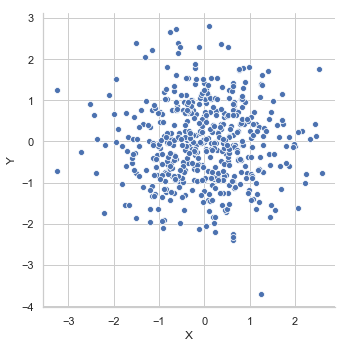

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

sns.set(style="whitegrid")

df1 = pd.DataFrame(dict(X=np.random.randn(500),
                       Y=np.random.randn(500)))

scatter1 = sns.relplot(x="X", y="Y",
                      data=df1, kind="scatter")

If we have an additional (discrete) variable that we'd like to categorize the data by, we can use color to differentiate between samples. 

In [ ]:
df2 = pd.DataFrame(dict(X=np.random.randn(500),
                       Y=np.random.randn(500),
                       cat=np.random.randint(2, size=500)))

scatter2 = sns.relplot(x="X", y="Y", hue="cat",
                      data=df2, kind="scatter")

... we can also use point styles...

In [ ]:
df3 = pd.DataFrame(dict(X=np.random.randn(500),
                       Y=np.random.randn(500),
                       cat_a=np.random.randint(2, size=500),
                       cat_b=np.random.randint(3, size=500)))

scatter3 = sns.relplot(x="X", y="Y", hue="cat_a", style="cat_b",
                      data=df3, kind="scatter")

... as well as size...

In [ ]:
df4 = pd.DataFrame(dict(X=np.random.randn(500),
                       Y=np.random.randn(500),
                       cat_a=np.random.randint(2, size=500),
                       cat_b=np.random.randint(3, size=500),
                       cat_c=np.random.randint(10, size=500)))

scatter4 = sns.relplot(x="X", y="Y", hue="cat_a", style="cat_b", size="cat_c",
                      data=df4, kind="scatter")

We can also fit a regression to visualize the relationship between our variables. 

In [ ]:
reg = sns.regplot(x="X", y="Y", data=df1)

#### Line plots

If our independent variable is a continuous variable --- or even a discrete variable that can be sorted as some function of time --- it might be better to draw a line plot. Here we'll visualize the loss, dev UAS, and dev LAS of a neural dependency parser as a function of training epoch. 

In [ ]:
training_plot = sns.relplot(x="epoch", y="loss", color="r",
                            kind="line", data=training)

In [ ]:
uas_plot = sns.relplot(x="epoch", y="dev_uas", color="g",
                       kind="line", data=training)

In [ ]:
las_plot = sns.relplot(x="epoch", y="dev_las", color="b",
                       kind="line", data=training)

Now let's try to put these all into one plot. Since `seaborn` is essentially an easy-to-understand interface for Matplotlib, we can also use all of Matplotlib's power to make more advanced plots (ignore the empty ones).  

In [1]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

loss = sns.relplot(x="epoch", y="loss", color="r",
                   kind="line", data=training, ax=ax1)

uas = sns.relplot(x="epoch", y="dev_uas", color="g",
                  kind="line", data=training, ax=ax2)

las = sns.relplot(x="epoch", y="dev_las", color="b",
                  kind="line", data=training, ax=ax3)

ax1.set_title("Loss per Epoch")
ax2.set_title("Dev UAS per Epoch")
ax3.set_title("Dev LAS per Epoch")
ax1.set_ylabel("Loss")
ax2.set_ylabel("Dev UAS")
ax3.set_ylabel("Dev LAS")
ax2.set_ylim(0.4 ,1.0)
ax3.set_ylim(0.4 ,1.0)

NameError: name 'plt' is not defined

#### Bar plots

If our independent variable is discrete and we're interested in representing the overall tendency of its levels (as opposed to a distribution), then a bar plot might be what we're looking for. This works if you're working with count data, for example. Let's plot the Top 10 place mentions in Obama's speeches. 

In [ ]:
counts = ent_counter(processed_speeches, 
                     ent_label = "GPE",
                     n=10)

top_10_places = pd.DataFrame(dict(ent_label = [ent[0] for ent in counts],
                                  ent_count = [ent[1] for ent in counts]))

place_plot = sns.catplot(x="ent_label", y="ent_count", 
                         kind="bar", palette="colorblind",
                         data=top_10_places)

place_plot.set_xticklabels(rotation=90)

This will complete the lecture on preprocessing and visualization. You should now have a good grasp of the toolkits to work with when cleaning and looking at data. In the next lecture we'll employ some of the concepts we've learned here to write and deploy a self-standing Python package. 